In [1]:
pip install scikit-learn==0.23.1

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [5]:
df=pd.read_csv('teleCust1000t.txt')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [7]:
df.shape

(1000, 12)

## ابتدا نگاهی به دیتا می اندازیم 

In [11]:
#مثلا اول ببینیم توی داده ها از هر کتگوری چند تا داریم

df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

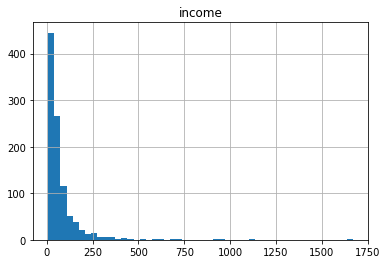

In [14]:
#یا بیایم هیستوگرام بکشیم بر اساس قسمتهای مختلف داده

df.hist(column= 'income', bins=50) #بین رو 50 گذاشتیم روی محور افقی هرکدوم از خطای کوچیک 50 هستند


In [15]:
#یه نگاه به ستونهایمان می اندازیم

df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


# یک نکته مهم اینه که ما فایل داده ها را با پانداز خوندیم. اما سایکیت لرن با نامپای کار میکنه.

### پانداز داده ها رو به صورت خوشگل و جدولی میخونه که بالاتر دیدیم
### اما نامپای میاد ارایه هایی از ارایه ها درست میکنه تا سایکیت لرن بتونه باهاشون کار کنه

In [32]:
# میایم فایل داده ها رو میبریم به فضای نامپای 
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]
# میبینیم که همون اعداد جدول بالا رو اینجا در غالب ارایه داریم
# یه نکته دیگه هم اینکه اومده اخرین ستون (طبقه بندی مشتریان) رو حف کرده. یعنی اینجا فقط با ایکس ها سر و کار داریم. به همین خاطر اسم متغیر رو هم گذاشته ایکس


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [30]:
# همچنین طبقه بندی مشتریان رو هم به عنوان ایگرگ جدا میکنیم
y=df[['custcat']].values
y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]], dtype=int64)

# یعنی ایکس ها جدا و ایگرگ ها جدا شدند از هم

In [22]:
# حالا میایم داده ها رو روی منحنی نرمال استاندارد نرمالیزه می کنیم
# چرا نرمالیزه؟ چون راحت تر بتونیم باهاشون کار کنیم
# یادمون هست که منحنی نرمال استاندارد میانگینش صفر بود و یه زد داشت که ایکس منهای عدد واقعی تقسیم بر انحراف معیار بود


In [34]:
# برای اینکه تفاوت ها رو ببینی هم اعداد واقعی رو پرینت کردم هم اعداد نرمالایز شده رو
print(X[0:2])
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X.astype(float))
print(X[0:2])

[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]]
[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]]


In [35]:
# It is important that our models have a high, out-of-sample accuracy
#because the purpose of any model, of course, is to make correct predictions on unknown data
# پس اینجا هم داده رو به دو دسته ترین و تست تقسیم میکنیم
# با ترین تمرین میکنیم و با تست ازمایش میکنیم

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#0.2 of data is for train and 0.8 is for test
#رندوم استیت واسه اینه که هر بار ران میکنیم کد رو، به شکل یکسانی داده ها رو تقسیم به ترین و تست کنه
#ینی کار که رندوم انجام میشه رو تکرارپذیر میکنه

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


# حالا بریم کلاس بندی کنیم

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Training

In [43]:
# lets put k=4
k = 4

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

# کلا سایکیت لرن غالبا اینطوره که فانکشن رو صدا میزنیم بعد میگیم این فانکشن رو بر اساس ایکس و ایگرگ من فیت کن (در کد بالا میبینیم اینو) 

# Predicting:

In [54]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [57]:
# میتونیم توی چند تا داده اول مقایسه کنیم بین مقادیر واقعی و پیش بینی شده
print(y[0:5])
print(yhat[0:5])

[[1]
 [4]
 [3]
 [1]
 [3]]
[1 1 3 2 4]


 # Accuracy evaluation

In [58]:
# اینجا از شاخص جاکار برای تعیین صحت الگوریتم استفاده میکنیم

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# میبینیم که صحت رو یک بار برای داده ترین و یکبار برای داده تست محاسبه کردیم
# مشاهده میکنیم که صحت داده ترین بالاتره
#  مشاهده میکنیم که کلا صحت بالایی نداریم (نه در تست نه در ترین). از همون ۵ تای اولی که پیشبینی کردیم بالاتر معلوم بود صحتش پایینه نسبتا

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


# یه نکته مهم اینه که باید صحت الگوریتم رو به ازای مقادر مختلف کی حساب کنیم
* پس میایم مقادیر صحت این الگوریتم رو بر اساس مقادیر مختلف کی میسنجیم

In [62]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
# مشاهده میشه که بالاترین صحت برای کی=9 بدست اومده

C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

### Plot the model accuracy for a different number of neighbors.

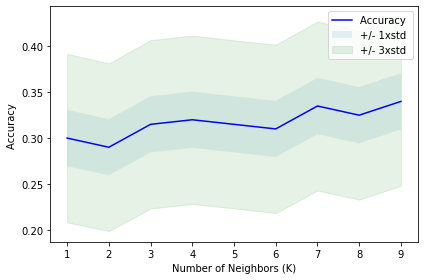

In [61]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [63]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
